# **Iris Flower Classification**
By: Vignesh Naik As part of Data Science internship at CodSoft.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [20]:
data = pd.read_csv('IRIS.csv')
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

In [21]:
def plot_decision_boundaries(X, y, feature1, feature2, title):
    cmap_background = ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    cmap_points = ListedColormap(['#ff0000', '#00ff00', '#0000ff'])

    x_min, x_max = X[feature1].min() - 0.5, X[feature1].max() + 0.5
    y_min, y_max = X[feature2].min() - 0.5, X[feature2].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))


    X_train, X_test, y_train, y_test = train_test_split(X[[feature1, feature2]], y, test_size=0.3, random_state=42)


    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    plt.scatter(X[feature1], X[feature2], c=y, s=50, edgecolor='k', cmap=cmap_points)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'{title} (Accuracy: {accuracy:.2f})')
    plt.show()

    return accuracy

In [22]:
feature_pairs = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width', 'petal_length'),
    ('sepal_width', 'petal_width'),
    ('petal_length', 'petal_width')
]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


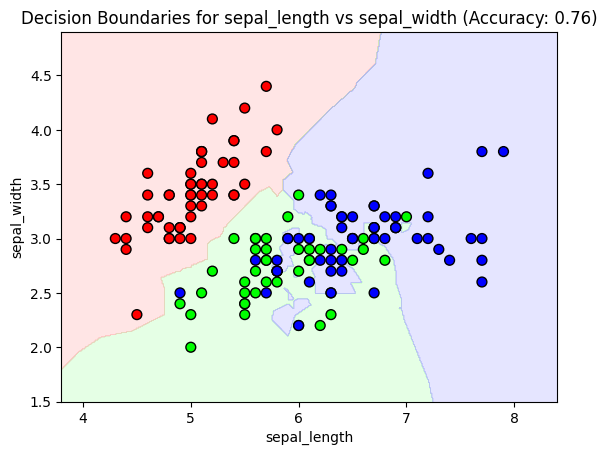

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


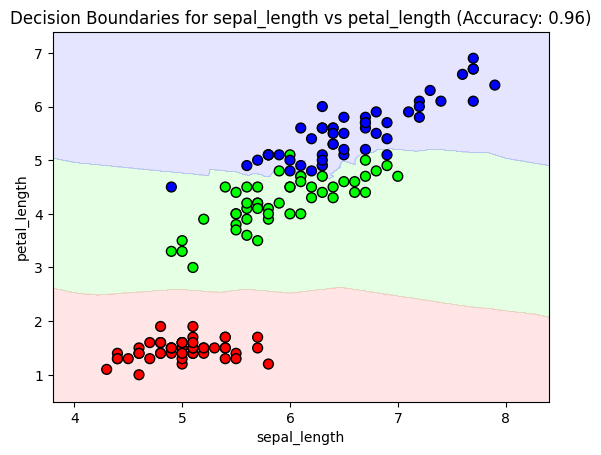

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


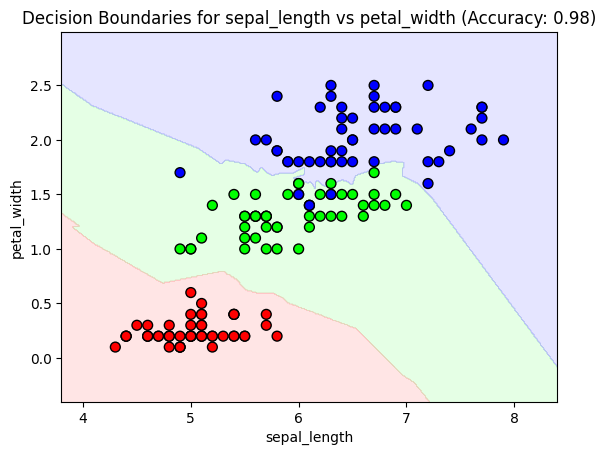

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


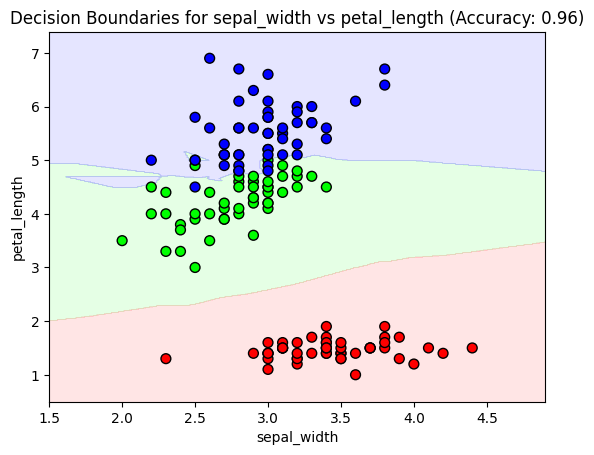

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


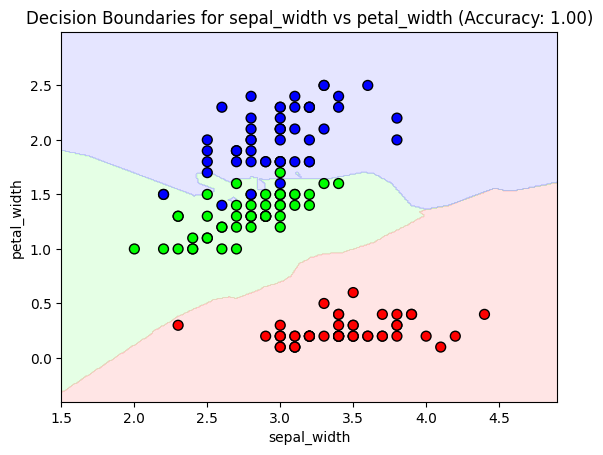

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


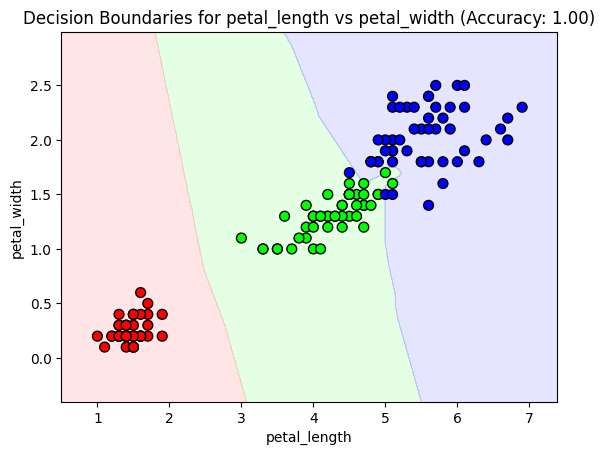


Accuracies for each feature pair:
('sepal_length', 'sepal_width'): 0.76
('sepal_length', 'petal_length'): 0.96
('sepal_length', 'petal_width'): 0.98
('sepal_width', 'petal_length'): 0.96
('sepal_width', 'petal_width'): 1.00
('petal_length', 'petal_width'): 1.00


In [23]:
accuracies = {}

for feature1, feature2 in feature_pairs:
    accuracy = plot_decision_boundaries(data, data['species'], feature1, feature2,
                                                         f'Decision Boundaries for {feature1} vs {feature2}')
    accuracies[(feature1, feature2)] = accuracy


print("\nAccuracies for each feature pair:")
for feature_pair, accuracy in accuracies.items():
    print(f'{feature_pair}: {accuracy:.2f}')

I Observed that sepal_length vs sepal_width, gave the worst classification.
Rest of the combinations gave a goo result with following combinations having highest accuracy:
('sepal_width', 'petal_width'),('petal_length', 'petal_width')